<a href="https://colab.research.google.com/github/AKMSurendra/MachineLearning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simple Linear Regression

Predicting the percentage of marks that a student scores based upon the number of hours they have studied.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore'      )

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML data/student_scores.csv')
dataset.shape

(25, 2)

In [ ]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

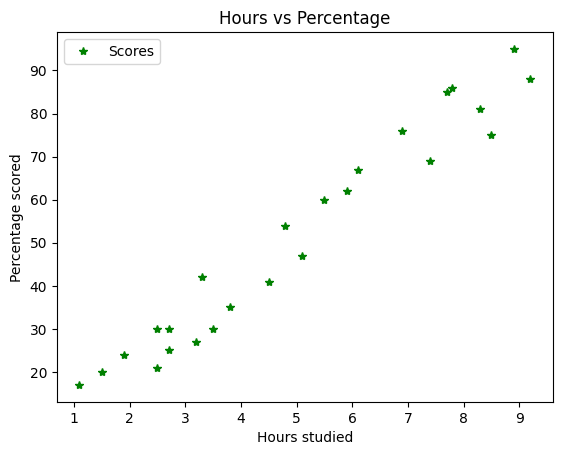

In [ ]:
dataset.plot(x='Hours', y='Scores', style='*', c='g')
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.show();

In [ ]:
# prepare my data
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,1]

In [ ]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [ ]:
X.shape

(25, 1)

In [ ]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [ ]:
y.shape

(25,)

In [ ]:
np.random.rand(3,2)

array([[0.12662724, 0.93072322],
       [0.76988883, 0.65919706],
       [0.18049834, 0.6894673 ]])

In [ ]:
np.random.seed(0)
np.random.rand(3,2)

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411]])

In [ ]:
np.random.seed(990)
np.random.rand(3,2)

array([[0.9806089 , 0.26989058],
       [0.09874419, 0.42379487],
       [0.11342195, 0.61825621]])

In [ ]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
X_train.head()

,Hours
24,7.8
23,6.9
14,1.1
1,5.1
10,7.7


In [ ]:
y_train.head()

24    86
23    76
14    17
1     47
10    85
Name: Scores, dtype: int64

In [ ]:
X_test.head()

In [ ]:
y_test.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Intercept:",regressor.intercept_)

Intercept: 1.9322042531516601


In [ ]:
print("Slope:",regressor.coef_)

Slope: [9.94167834]


y = 9.94167834 * x + 1.932204253151646 

In [ ]:
9.94167834 * 5.5 + 1.932204253151646

56.611435123151644

In [ ]:
9.91 * 6.9 + 2.018

70.397

In [ ]:
# Predictions

y_pred = regressor.predict(X_test)
y_pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [ ]:
y_test

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [ ]:
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


In [ ]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.130879918502482
Mean Squared Error: 20.33292367497996
Root Mean Squared Error: 4.509204328368805


In [ ]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.9367661043365056


In [ ]:
type(float((metrics.r2_score(y_test, y_pred))))

float

In [ ]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: 0.9156881391153409


Multiple Linear Regression:

Predict the gas consumption (in million of gallons) in 48 US states based upon the gas taxes, per capita income, paved highways (in miles), and the proportion of population that has driving license.

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/ML data/petrol_consumption.csv")

In [ ]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


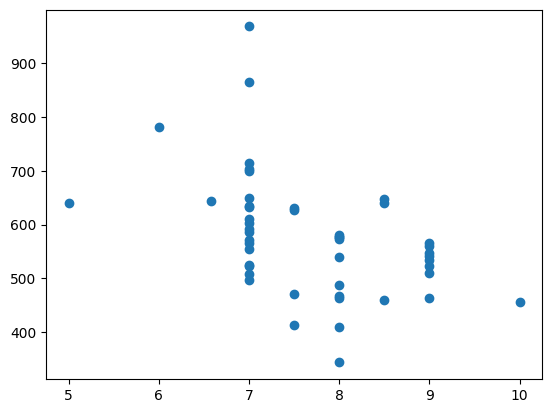

In [ ]:
plt.scatter('Petrol_tax','Petrol_Consumption', data=dataset);

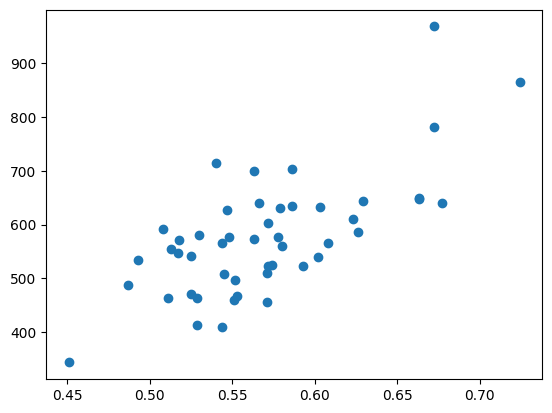

In [ ]:
plt.scatter('Population_Driver_licence(%)','Petrol_Consumption', data=dataset);

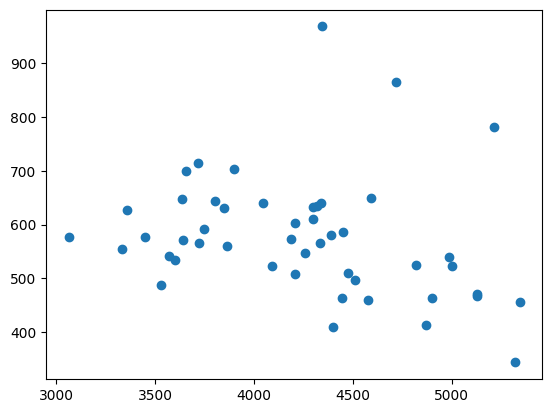

In [ ]:
plt.scatter('Average_income','Petrol_Consumption', data=dataset);

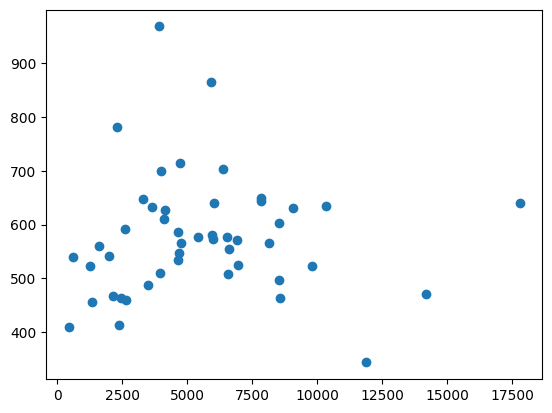

In [ ]:
plt.scatter('Paved_Highways','Petrol_Consumption', data=dataset);

In [ ]:
dataset.shape

(48, 5)

In [ ]:
dataset.size

240

In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
X = dataset.drop(['Petrol_tax','Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
# X = dataset.drop(['Petrol_Consumption','Average_income','Paved_Highways'], axis=1)
X.head()

,Population_Driver_licence(%)
0,0.525
1,0.572
2,0.580
3,0.529
4,0.544


In [ ]:
y = dataset['Petrol_Consumption']
y.head()

In [ ]:
X.shape

(48, 1)

In [ ]:
y.shape

(48,)

In [ ]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(38, 1)

In [ ]:
X_test.shape

(10, 1)

In [ ]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([1508.07066816])

In [ ]:
regressor.intercept_

-285.66717240517744

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

,Coefficient
Population_Driver_licence(%),1508.070668


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
29,534,457.811667
4,410,534.723271
26,577,540.755554
30,571,495.513434
32,577,585.997674
37,704,598.062239
34,487,448.763243
40,587,658.385066
7,467,548.295907
10,580,513.610282


In [ ]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.4885499524333
Mean Squared Error: 5725.070173663769
Root Mean Squared Error: 75.66419347130959


In [ ]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: 0.022932195966889557


In [ ]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: -0.30275707204414726


Retrain

In [ ]:
# TTS

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape

(24, 4)

In [ ]:
X_test.shape

(15, 1)

In [ ]:
# Train the algorithm

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.coef_

array([1566.75730759])

In [ ]:
regressor.intercept_

-322.1152419439519

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
# pd.DataFrame(data, rowname, colname)
coeff_df

,Coefficient
Population_Driver_licence(%),1566.757308


In [ ]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({
    'Actual':y_test,
    'Predicted':y_pred
})
df

,Actual,Predicted
29,534,450.296111
4,410,530.200733
26,577,536.467763
30,571,489.465043
32,577,583.470482
37,704,596.004540
34,487,440.895567
40,587,658.674833
7,467,544.301549
10,580,508.266131


In [ ]:
# Evaluate

from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 68.73914178304157
Mean Squared Error: 5573.483710556493
Root Mean Squared Error: 74.65576809970207


In [ ]:
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred))

R2 Error: -0.07188242337633088


In [ ]:
r2 = (metrics.r2_score(y_test, y_pred))
n = 5
k = 1
adj_r2 = 1 - (((1-r2)*(n-1))/(n-k-1))
print("Adjusted R2 Error:", adj_r2)

Adjusted R2 Error: -0.42917656450177444


Factors

1)Need more data: What we have is just one year data, whereas multiple years data would have helped in getting a better model.

2)Bad Assumptions: We made the assumption that the data has linear relationship, which may not be the case. Visualizing that first would have been a better idea.

3)Poor features The features we used may not have had a high corelation to the values we are trting to predict.

4)Granularity.

Logistic

Student Grant Recommendation

In [ ]:
# 1. Data Retrieval
df = pd.read_csv("/content/drive/MyDrive/ML data/student_records.csv")
df

,Name,OverallGrade,Obedient,ResearchScore,ProjectScore,Recommend
0,Henry,A,Y,90,85,Yes
1,John,C,N,85,51,Yes
2,David,F,N,10,17,No
3,Holmes,B,Y,75,71,No
4,Marvin,E,N,20,30,No
5,Simon,A,Y,92,79,Yes
6,Robert,B,Y,60,59,No
7,Trent,C,Y,75,33,No


# 2. Data preparation

Missing values or errors --> NO

Therefore, we dont need to go through this phase.

In [ ]:
# 3. Feature Extraction and Engineering

features_names = ['OverallGrade','Obedient','ResearchScore','ProjectScore']
training_features = df[features_names]
training_features

In [ ]:
outcome_name = ['Recommend']
outcome_labels = df[outcome_name]
outcome_labels

In [ ]:
training_features

In [ ]:
numeric_feature_names = ['ResearchScore','ProjectScore']
categorical_feature_names = ['OverallGrade','Obedient']

In [ ]:
training_features[numeric_feature_names]

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# ss, now u go and study these numeric columns --> i.e. fit() over it
ss.fit(training_features[numeric_feature_names])
# ss, now appear for the test
training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])
training_features

In [ ]:
# Engineering Categorical features

training_features = pd.get_dummies(training_features, columns=categorical_feature_names)
training_features

In [ ]:
training_features.columns

In [ ]:
numeric_feature_names

In [ ]:
list(set(training_features.columns) - set(numeric_feature_names))

In [ ]:
categorical_engineered_features = list(set(training_features.columns) - set(numeric_feature_names))
categorical_engineered_features

In [ ]:
training_features

In [ ]:
outcome_labels

In [ ]:
outcome_labels.shape

In [ ]:
y = np.array(outcome_labels['Recommend'])
y

In [ ]:
y.shape

In [ ]:
# 4. Modeling

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(training_features, y )

In [ ]:
print(model)

In [ ]:
# 5. Model Evaluation

pred_labels = model.predict(training_features)
actual_labels = np.array(outcome_labels['Recommend'])
print(pred_labels)
print()
print(actual_labels)

In [ ]:
model.predict([[0.899583,1.376650,1,0,0,0,0,0,1]])

In [ ]:
model.predict([[0.5,0.5,1,0,0,0,0,0,1]])

In [ ]:
model.predict([[0.5,0.5,1,0,0,0,0,1,0]])

In [ ]:
model.predict([[0.5,0.5,0,0,0,0,1,0,1]])

In [ ]:
print(pred_labels,"\n\n",actual_labels)

['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No'] 

 ['Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No']


In [ ]:
# Performance of the model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:\n")
accuracy_score(actual_labels,pred_labels)

Accuracy:



1.0

In [ ]:
print("Confusion Matrix:\n")
confusion_matrix(actual_labels,pred_labels)

Confusion Matrix:



array([[5, 0],
       [0, 3]])

In [ ]:
print("Classification Report:\n")
print(classification_report(actual_labels,pred_labels))

Classification Report:

              precision    recall  f1-score   support

          No       1.00      1.00      1.00         5
         Yes       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [ ]:
# Model Deployment

import joblib
import os

if not os.path.exists('Model'):
    os.mkdir("Model")
if not os.path.exists('Scaler'):
    os.mkdir("Scaler")
    
joblib.dump(model,r"Model/cliet_model.pickle")
joblib.dump(ss,r"Scaler/client_ss.pickle")

['Scaler/client_ss.pickle']

**Decision Trees in Python with Scikit-Learn**

**Introduction**

A decision tree is one of most frequently and widely used supervised machine learning algorithms that can perform both regression and classification tasks.

For each attribute in the dataset, the decision tree algorithm forms a node, where the most important attribute is placed at the root node. For evaluation we start at the root node and work our way down the tree by following the corresponding node that meets our condition or "decision". This process continues until a leaf node is reached, which contains the prediction or the outcome of the decision tree.

Consider a scenario where a person asks you to lend them your car for a day, and you have to make a decision whether or not to lend them the car. There are several factors that help determine your decision, some of which have been listed below:
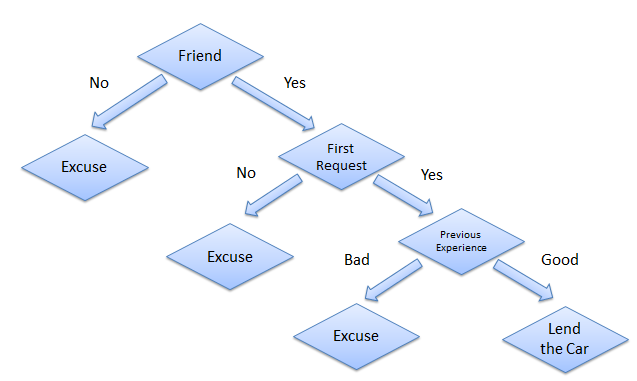")

**Advantages of Decision Trees:**

There are several advantages of using decision treess for predictive analysis:

1) Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and classification tasks.

2) They require relatively less effort for training the algorithm.

3) They can be used to classify non-linearly separable data.

4) They're very fast and efficient compared to KNN and other classification algorithms.

**1. Decision Tree for Classification**

Here, we will predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, kurtosis of the image, entropy, and skewness of the image.

In [ ]:
# doing the minimum necessary imports
# more modules would be imported as and when needed

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
#try %matplotlib notebook

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("/content/drive/MyDrive/ML data/bill_authentication.csv")  

# Exploratory Data Analysis(EDA)
print(bankdata.shape)  
print("------------")
print(bankdata.head()) 
#class=0 Not fake
#Class=1 Fake
print("------------")
print(bankdata.columns)

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
------------
Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')


In [ ]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels, do :
X=bankdata.drop('Class',axis=1)
y=bankdata['Class']
# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
# Training the Algorithm. Here we would use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)
# make predictions on the test data
y_pred=classifier.predict(X_test)
# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix  
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),"\n")  
print("\nclassification_report:\n",classification_report(y_test, y_pred))
# Remember : for evaluating classification-based ML algo use  
# confusion_matrix, classification_report and accuracy_score.
# And for evaluating regression-based ML Algo use Mean Squared Error(MSE), ...

Confusion Matrix:
 [[144   2]
 [  4 125]] 


classification_report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.98      0.97      0.98       129

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



**Conclusion :** Try 1: From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 2. This is 98.5% accuracy. This will change everytime depending upon weighted avg precision value. Try 2: From the confusion matrix, you can see that out of 275 test instances, our algorithm misclassified only 2. This is 99.27% accuracy.

In [ ]:
#Loop the above process
from sklearn.model_selection import train_test_split
i=1
x=0.05
test_sz=.85
for i in range(1,10):
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.85-x)


 # Training the Algorithm. Here we would use DecisionTreeClassifier
 from sklearn.tree import DecisionTreeClassifier  
 classifier = DecisionTreeClassifier()  
 classifier.fit(X_train, y_train)

 # make predictions on the test data
 y_pred=classifier.predict(X_test)



 # Evaluating the Algorithm
 from sklearn.metrics import classification_report, confusion_matrix
 print("Iteration",i,":\n")
 print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred),"\n")  
 print("\nclassification_report:\n",classification_report(y_test, y_pred))
 x=test_sz-0.05

# Remember : for evaluating classification-based ML algo use  
# confusion_matrix, classification_report and accuracy_score.
# And for evaluating regression-based ML Algo use Mean Squared Error(MSE), ...

Iteration 1 :

Confusion Matrix:
 [[588  24]
 [ 26 460]] 


classification_report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       612
           1       0.95      0.95      0.95       486

    accuracy                           0.95      1098
   macro avg       0.95      0.95      0.95      1098
weighted avg       0.95      0.95      0.95      1098

Iteration 2 :

Confusion Matrix:
 [[47  0]
 [ 0 22]] 


classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        22

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Iteration 3 :

Confusion Matrix:
 [[43  1]
 [ 0 25]] 


classification_report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    

**2. Decision Tree for Regression**
------------------------------------------------------

We will petrol_consumption.csv dataset to try and predict gas consumptions (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with a drivers license.

In [ ]:
# Importing Libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# Importing the Dataset
dataset = pd.read_csv('/content/drive/MyDrive/ML data/petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
# To see statistical details of the dataset, execute the following command:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
# Preparing the Data
# divide the data into attributes and labels

X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  
# dividing data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=0)
# Training and Making Predictions
# Note : we will using DecisionTreeRegressor class , not DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)
# To make predictions on the test set, 
y_pred = regressor.predict(X_test)  
# Now let's compare some of our predicted values with the actual values 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df  

,Actual,Predicted
29,534,541.0
4,410,524.0
26,577,487.0
30,571,554.0
32,577,487.0


**Remember :

that in your case the records compared may be different, depending upon the training and testing split. Since the train_test_split method randomly splits the data we likely won't have the same training and test sets.

In [ ]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 63.6
Mean Squared Error: 5906.8
Root Mean Squared Error: 76.855708961664


The mean absolute error for our algorithm is 56.09, which is less than 10% of 576.77 i.e. 57.677 of all the values in the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job. All though getting a value <10% would have been better.

Lets find another model for prediction which gives rmse within 57.6(i.e. 10% of 576)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML data/petrol_consumption.csv')
print(dataset.head())
print(".......................")
print(dataset.describe())

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
.......................
       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250000   
50%      7.500000     4298.000000     4

In [ ]:
X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0., random_state=0) #default tset_size=0.25,
                                                                                            #random_state=seedvalue

# Training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)  
# Now let's compare some of our predicted values with the actual values 
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df

,Actual,Predicted
29,534,468.446949
4,410,550.475773
26,577,589.922533
30,571,572.151628
32,577,648.442611
37,704,645.441003
34,487,517.913312
40,587,669.802235
7,467,499.668226
10,580,496.656659


In [ ]:
# Evaluating the Algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 47.71470395631451
Mean Squared Error: 3307.870663967293
Root Mean Squared Error: 57.51409100357314


**Random Forest Algorithm with Python and Scikit-Learn**

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where you join different types of algorithms or same algorithm multiple times to form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest". The random forest algorithm can be used for both regression and classification tasks.

**How the Random Forest Algorithm Works:**

The following are the basic steps involved in performing the random forest algorithm:

1 Pick N random records from the dataset.

2 Build a decision tree based on these N records.

3 Choose the number of trees you want in your algorithm and repeat steps 1 and 2.

4 In case of a regression problem, for a new record, each tree in the forest predicts a value for Y (output). The final value can be calculated by taking the average of all the values predicted by all the trees in forest.

Or, in case of a classification problem, each tree in the forest predicts the category to which the new record belongs. Finally, the new record is assigned to the category that wins the majority vote.

**Advantages of using Random Forest**
As with any algorithm, there are advantages and disadvantages to using it. In the next two sections we'll take a look at the pros and cons of using random forest for classification and regression.

1> The random forest algorithm is not biased, since, there are multiple trees and each tree is trained on a subset of data. Basically, the random forest algorithm relies on the power of "the crowd"; therefore the overall biasedness of the algorithm is reduced.

2> This algorithm is very stable. Even if a new data point is introduced in the dataset the overall algorithm is not affected much since new data may impact one tree, but it is very hard for it to impact all the trees.

3> The random forest algorithm works well when you have both categorical and numerical features.

4> The random forest algorithm also works well when data has missing values or it has not been scaled well.

**Disadvantages of using Random Forest**

1> A major disadvantage of random forests lies in their complexity. They required much more computational resources, owing to the large number of decision trees joined together.

2> Due to their complexity, they require much more time to train; than other comparable algorithms.

**1> Using Random Forest for Regression**

Problem Definition : The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/ML data/petrol_consumption.csv')  
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
# Preparing the Data
# divide the data into attributes and labels

X = dataset.drop('Petrol_Consumption', axis=1)  
y = dataset['Petrol_Consumption']  

# dividing data into training and testing set .. type your code here

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0) #default tset_size=0.25,
                                                                                            #random_state=seedvalue
# Training and Making Predictions
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  

# The RandomForestRegressor class of the sklearn.ensemble library
# is used to solve regression problems via random forest. 
# The most important parameter of the RandomForestRegressor class 
# is the n_estimators parameter. 
# This parameter defines the number of trees in the random forest.

# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 49.97291666666667
Mean Squared Error: 3873.2832291666673
Root Mean Squared Error: 62.235707027129266


With 20 trees, the root mean squared error is 62.23 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).

In [ ]:
# If the number of estimators is changed to 50, the results are as follows:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)  
regressor.fit(X_train, y_train)  
y_pred = regressor.predict(X_test)  
# Evaluating the Algorithm
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 48.13999999999999
Mean Squared Error: 3392.6936999999984
Root Mean Squared Error: 58.246834248738345


With 50 trees, the root mean squared error is 58.24 which is close to 10 percent of the average petrol consumption i.e. 576.77. (~ these values may change depending upon the train-test data set).

**2: Using Random Forest for Classification**

Problem Definition : The task here is to predict whether a bank currency note is authentic or not based on four attributes i.e. variance of the image wavelet transformed image, skewness, entropy, and curtosis of the image.

In [ ]:
# doing the minimum necessary imports
# more modules would be imported as and when needed
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

# reading data from CSV file. 
# reading bank currency note data into pandas dataframe.
bankdata = pd.read_csv("/content/drive/MyDrive/ML data/bill_authentication.csv")  

# Exploratory Data Analysis
print(bankdata.shape)  
print("------------")
print(bankdata.head())

(1372, 5)
------------
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [ ]:
# Data Preprocessing
# Data preprocessing involves 
# (1) Dividing the data into attributes and labels and 
# (2) dividing the data into training and testing sets.

# To divide the data into attributes and labels -- type your code
X=bankdata.drop('Class',axis=1)
y=bankdata['Class']


# the final preprocessing step is to divide data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)



# Training the Algorithm.
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0)  
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)


# Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[149   1]
 [  3 122]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       150
           1       0.99      0.98      0.98       125

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275

0.9854545454545455


The accuracy achieved for by our random forest classifier with 20 trees is 100%.

The learner / Student is expected to try n_estimators values of 10 and 50. Do you observe any difference ? We find that n_estimators=20 gives best gradient descent point. Also, pl note that we can get multiple gradient descent points at regular intervals too may be 20,40,60,...

Note: We will never get 100 percent. Ideal results in realtime datasets is between 85 to 97.